### Exercise 1: House price prediction

##### Import the libraries necessary for this project.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import random
import warnings

warnings.filterwarnings("ignore")

##### Load the Housedata dataset.

In [2]:
df = pd.read_excel('dataset/housedata.xls', sheet_name='Sheet1')

##### Print the first 5 rows of the dataset to get the overview of dataframe.

In [3]:
df.head(5)

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502


##### As the column names are quite complex, we can change them to a simpler name so we can access our data easier.

In [4]:
df.columns = [col.replace(',', '') for col in df.columns]
df = df.rename(columns={'location ': 'location', '#bedrooms': 'bedrooms', '#bathrooms': 'bathrooms', 'house area in 1000 square feet': 'house_area', '1 if condo 0 otherwise ': 'is_condo', 'selling price in 1000 dollars': 'price'})

##### Get the data type of each column in the dataframe.

In [5]:
df.dtypes

location       int64
bedrooms       int64
bathrooms      int64
house_area     int64
is_condo       int64
price         object
dtype: object

##### Convert from object to int

In [6]:
df['price'] = df['price'].replace({';': ''}, regex=True).astype(int)

##### Split randomly the data into training (80%) and testing (20%)

In [7]:
X = df[['house_area','bedrooms']]
y = df['price']
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=695, random_state=42)

##### Create a scatter plot of actual and predicted sale price for all 774 houses

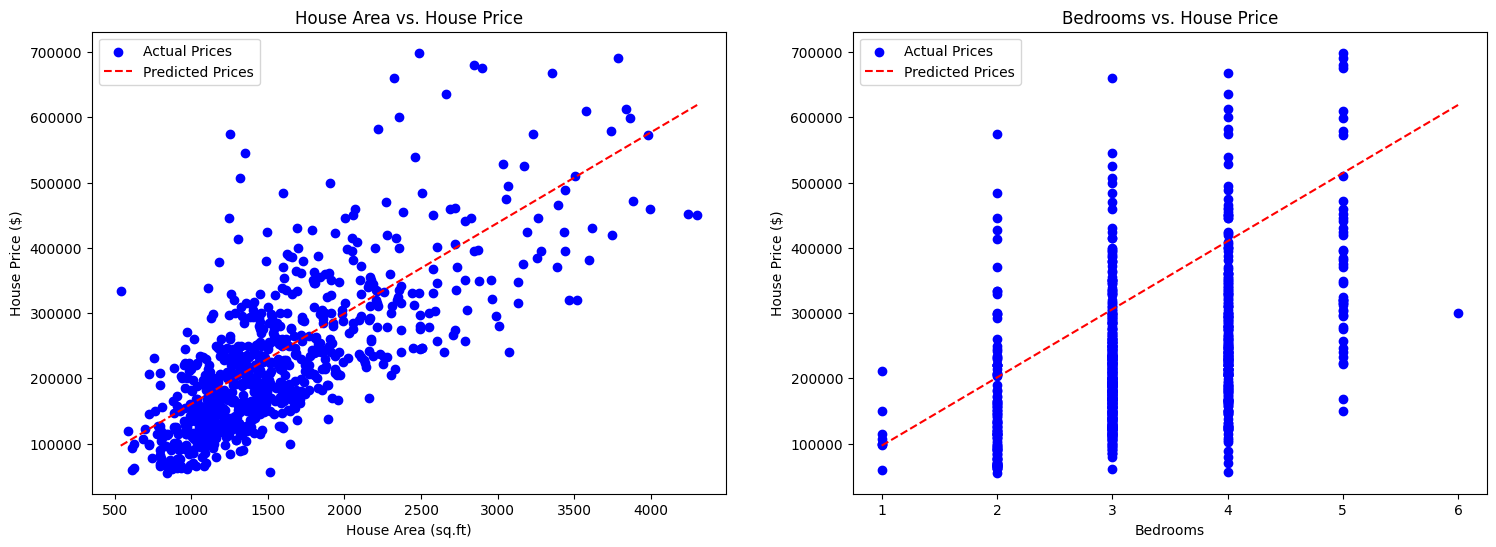

In [8]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X['house_area'], y, marker ='o', color ='blue', label='Actual Prices')
ax[0].plot([min(X['house_area']), max(X['house_area'])], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Predicted Prices')
ax[0].set_title('House Area vs. House Price')
ax[0].set_xlabel('House Area (sq.ft)')
ax[0].set_ylabel('House Price ($)')
ax[0].legend()

ax[1].scatter(X['bedrooms'], y, marker ='o', color ='blue', label='Actual Prices')
ax[1].plot([min(X['bedrooms']), max(X['bedrooms'])], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Predicted Prices')
ax[1].set_title('Bedrooms vs. House Price')
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('House Price ($)')
ax[1].legend()

plt.show()

##### Use the following 5 houses to test the efficiency of the above method

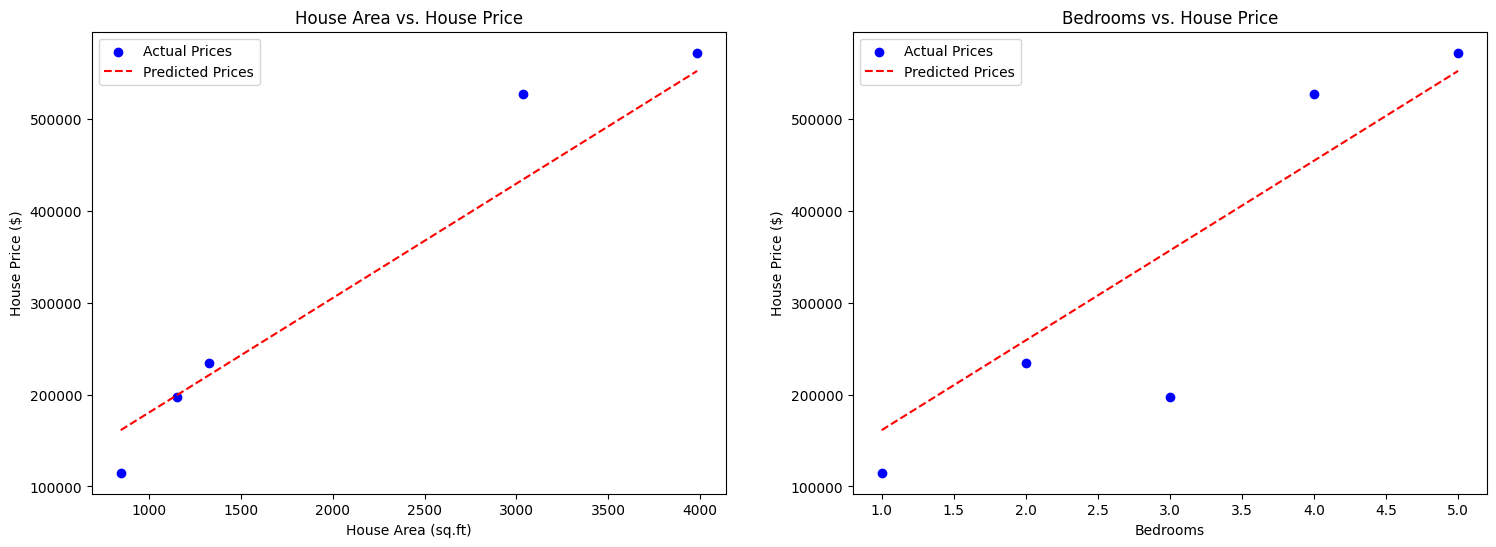

In [9]:
test_data = {
    'house_area': [846, 1324, 1150, 3037, 3984],
    'bedrooms': [1, 2, 3, 4, 5],
    'price': [115000, 234500, 198000, 528000, 572500]
}
df_test = pd.DataFrame(test_data)

X_test = df_test[['house_area', 'bedrooms']]
y_test_pred = model.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X_test['house_area'], df_test['price'], marker ='o', color ='blue', label='Actual Prices')
ax[0].plot([min(X_test['house_area']), max(X_test['house_area'])], [min(y_test_pred), max(y_test_pred)], color='red', linestyle='--', label='Predicted Prices')
ax[0].set_title('House Area vs. House Price')
ax[0].set_xlabel('House Area (sq.ft)')
ax[0].set_ylabel('House Price ($)')
ax[0].legend()

ax[1].scatter(X_test['bedrooms'], df_test['price'], marker ='o', color ='blue', label='Actual Prices')
ax[1].plot([min(X_test['bedrooms']), max(X_test['bedrooms'])], [min(y_test_pred), max(y_test_pred)], color='red', linestyle='--', label='Predicted Prices')
ax[1].set_title('Bedrooms vs. House Price')
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('House Price ($)')
ax[1].legend()

plt.show()

##### Calculate RMSE for the the training and test data

In [10]:
mse_train = mean_squared_error(y, y_pred)
rmse_train = math.sqrt(mse_train)

mse_test = mean_squared_error(df_test['price'], y_test_pred) 
rmse_test = math.sqrt(mse_test)

print(f'Root Mean Square Error (Train): {rmse_train:.2f}')
print(f'Root Mean Square Error (Test): {rmse_test:.2f}')

Root Mean Square Error (Train): 74845.72
Root Mean Square Error (Test): 51580.16


##### Find the new model resulting by the new base

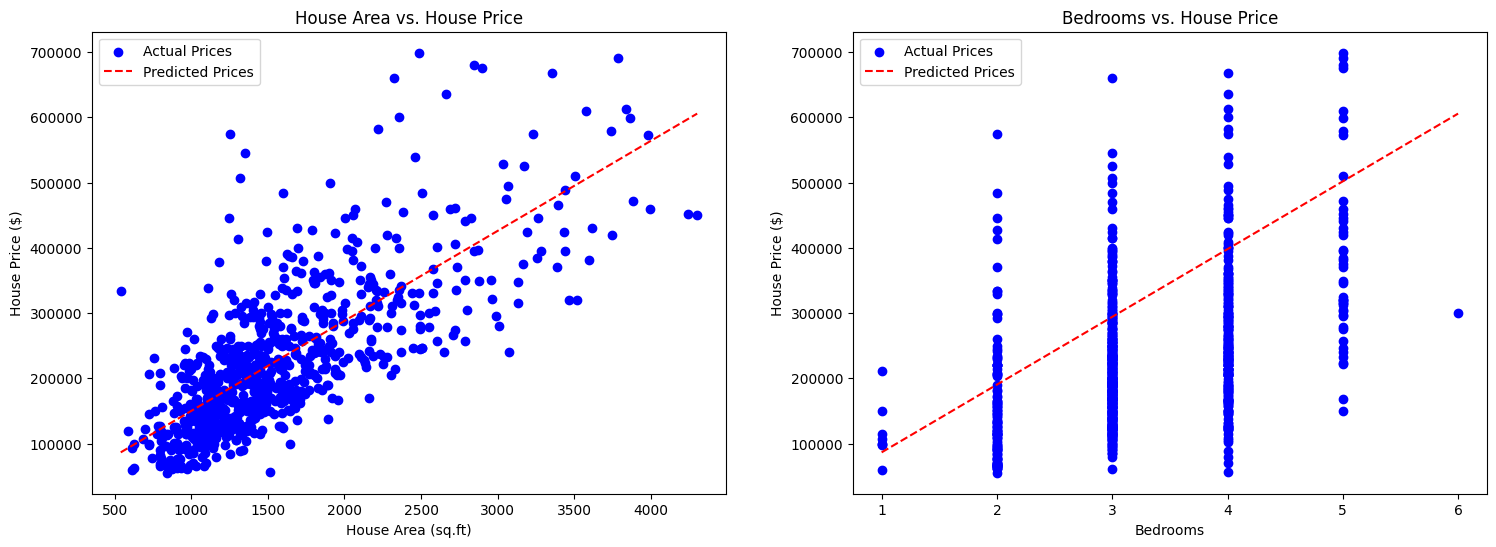

In [11]:
X_complex = pd.DataFrame({
    'f1': np.ones_like(df['house_area']),
    'f2': df['house_area'],
    'f3': np.maximum(df['house_area'] - 1.5, 0),
    'f4': df['bedrooms'],
    'f5': df['is_condo'],
    'f6': np.where(df['location']==2, 1, 0),
    'f7': np.where(df['location']==3, 1, 0),
    'f8': np.where(df['location']==4, 1, 0),
})
y = df['price']

model = LinearRegression()
model.fit(X_complex, y)
y_pred = model.predict(X_complex)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X_complex['f2'], y, marker ='o', color ='blue', label='Actual Prices')
ax[0].plot([min(X_complex['f2']), max(X_complex['f2'])], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Predicted Prices')
ax[0].set_title('House Area vs. House Price')
ax[0].set_xlabel('House Area (sq.ft)')
ax[0].set_ylabel('House Price ($)')
ax[0].legend()

ax[1].scatter(X_complex['f4'], y, marker ='o', color ='blue', label='Actual Prices')
ax[1].plot([min(X_complex['f4']), max(X_complex['f4'])], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Predicted Prices')
ax[1].set_title('Bedrooms vs. House Price')
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('House Price ($)')
ax[1].legend()

plt.show()

##### Use the cross validation technique for the above 2 models to testify the confidence in the generalization of the model and make the appropriate plots to visualize the performance of each model

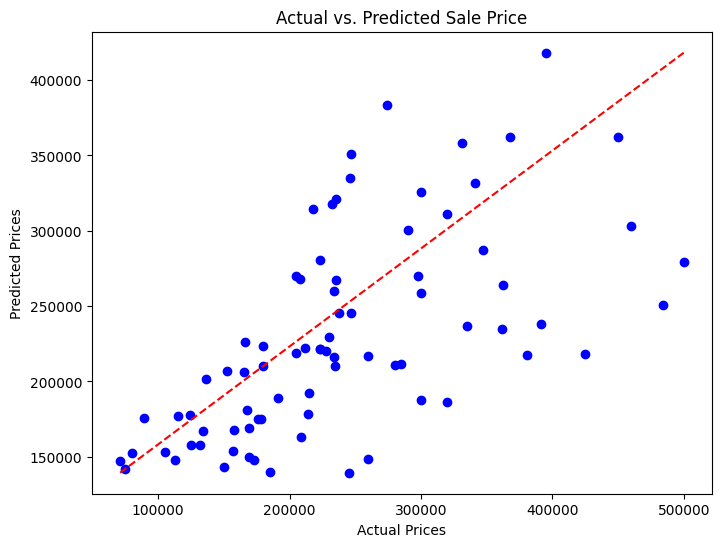

In [21]:
X = df[['house_area','bedrooms']]
y = df['price']
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=695, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Sale Price")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

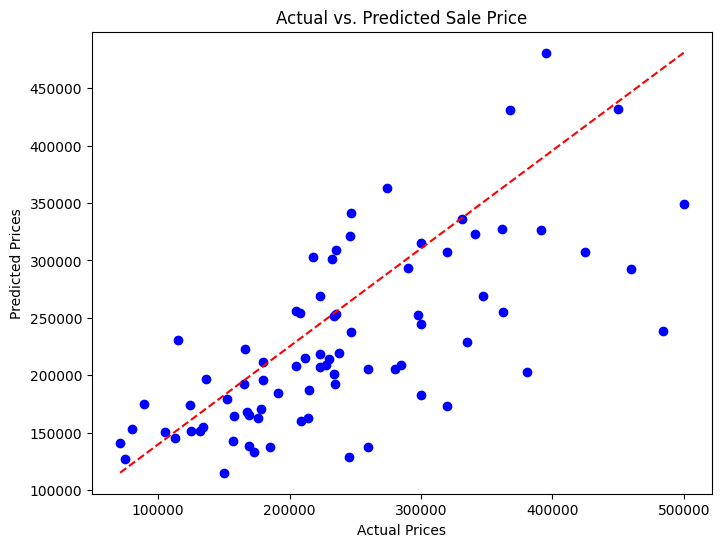

In [22]:
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X_complex, y, train_size=695, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Sale Price")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()